# Restaurant Review Sentiment Analysis


In [15]:
#Loading the important libraries
import numpy as np
import pandas as pd


In [16]:
import pandas as pd

# Specify the path to the CSV file
csv_file_path = 'Restaurant_Reviews.csv'

# Load the CSV file into a pandas DataFrame, skipping problematic lines
try:
    df = pd.read_csv(csv_file_path)
except pd.errors.ParserError as e:
    # Handle the specific error, if needed
    print(f"Error occurred while reading CSV: {str(e)}")


In [17]:
#Shape of the dataset
df.shape


(50000, 2)

In [18]:
#Columns of the dataset
df.columns


Index(['Review', 'sentiment'], dtype='object')

In [19]:
df.head()

,Review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [20]:
#Showcasing the first 15 rows of the dataset
df.head(15)

,Review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [21]:
df.tail()

,Review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [22]:
#Showcasing the last 15 rows of the dataset
df.tail(15)

,Review,sentiment
49985,Imaginary Heroes is clearly the best film of t...,positive
49986,This movie is a disgrace to the Major League F...,negative
49987,A remake of Alejandro Amenabar's Abre los Ojos...,negative
49988,"When I first tuned in on this morning news, I ...",negative
49989,I got this one a few weeks ago and love it! It...,positive
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative


In [23]:
#Importing the natural language toolkit 
import nltk 


In [24]:
#Regular expression specifies a set of strings that matches it, and the functions in this module let you check if a particular string matches or not.
import re

In [25]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [26]:
# Now we need to clean the reviews for that we need to lowercase the words, eliminate stop words, tokenize and do stemming and


In [27]:
# Create an empty corpus list
corpus = []

# Process each review in the DataFrame
for i in range(0,1000):
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    review = ' '.join([ps.stem(word) for word in review_words])
    corpus.append(review)

In [28]:
#Showcasing the reviews in the corpus 
corpus [0:20]

['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch d

In [29]:
import pickle

In [30]:
#Creating the BAG OF WORDS MODEL i.e. a method to extract features from the text documents 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [31]:
# Creating a pickle file for the CountVectorizer
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

In [32]:
#Doing the train,test, split where test_datasize percentage is 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 50000]

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)


MultinomialNB(alpha=0.2)

In [ ]:
# Creating a pickle file for the Multinomial Naive Bayes model
filename = 'restaurant-sentiment-mnb-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
#Predicting the test results 
y_pred = classifier.predict(X_test)



In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test,y_pred)
print("The Accuracy score is: {}".format(round(score1,2)))



The Accuracy score is: 0.78


In [ ]:
#Precision
from sklearn.metrics import precision_score
score2 = precision_score(y_test,y_pred)
print("The Precision score is: {}".format(round(score2,2)))



The Precision score is: 0.78


In [ ]:
#Recall
from sklearn.metrics import recall_score
score3= recall_score(y_test,y_pred)
print("The Recall score is: {}".format(round(score3,2)))



The Recall score is: 0.82


In [ ]:
print("The Accuracy, Precision, and Recall Scores:")
print("Accuracy score = {}".format(round(score1,2)))
print("Precision score = {}".format(round(score2,2)))
print("Recall score = {}".format(round(score3,2)))

The Accuracy, Precision, and Recall Scores:
Accuracy score = 0.78
Precision score = 0.78
Recall score = 0.82


In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[73, 24],
       [19, 84]], dtype=int64)

In [ ]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(83.22222222222221, 0.5, 'Actual Label')

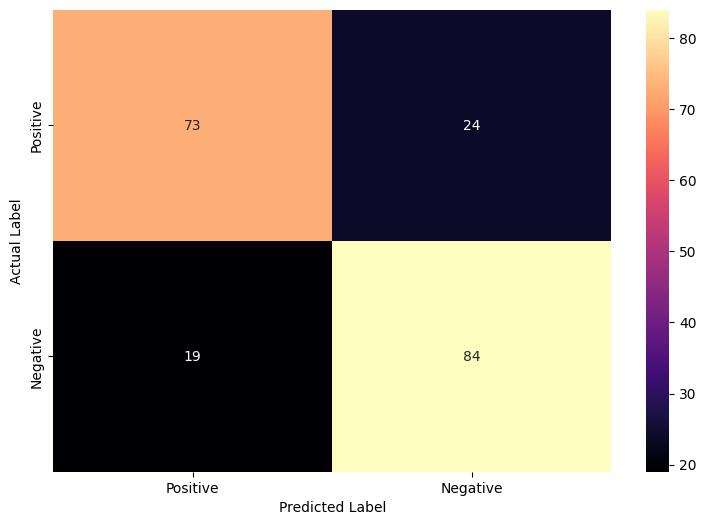

In [ ]:
plt.figure(figsize = (9,6))
sns.heatmap(cm, annot=True, cmap="magma", xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("The accuracy score for alpha {} is {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('--------------------------------------------')
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

The accuracy score for alpha 0.1 is 78.0%
The accuracy score for alpha 0.2 is 78.5%
The accuracy score for alpha 0.3 is 78.0%
The accuracy score for alpha 0.4 is 78.0%
The accuracy score for alpha 0.5 is 77.5%
The accuracy score for alpha 0.6 is 77.5%
The accuracy score for alpha 0.7 is 77.5%
The accuracy score for alpha 0.8 is 77.0%
The accuracy score for alpha 0.9 is 76.5%
The accuracy score for alpha 1.0 is 76.5%
--------------------------------------------
--------------------------------------------
--------------------------------------------
The best accuracy is 78.5% with alpha value 0.2


In [ ]:
#Since the best accuracy score is 78.5 % for alpha 0.2
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [ ]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [ ]:
# Predicting values
sample_review = 'Delicious'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [ ]:
from sklearn.naive_bayes import BernoulliNB

classifier = BernoulliNB(alpha=0.2, binarize=0.0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
filename = 'restaurant-sentiment-mnb-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test,y_pred)
print("The Accuracy score is: {}".format(round(score1,2)))

The Accuracy score is: 0.78


In [ ]:
#Precision
from sklearn.metrics import precision_score
score2 = precision_score(y_test,y_pred)
print("The Precision score is: {}".format(round(score2,2)))


The Precision score is: 0.78


In [ ]:
#Recall
from sklearn.metrics import recall_score
score3= recall_score(y_test,y_pred)
print("The Recall score is: {}".format(round(score3,2)))



The Recall score is: 0.81


In [ ]:
print("The Accuracy, Precision, and Recall Scores:")
print("Accuracy score = {}".format(round(score1,2)))
print("Precision score = {}".format(round(score2,2)))
print("Recall score = {}".format(round(score3,2)))

The Accuracy, Precision, and Recall Scores:
Accuracy score = 0.78
Precision score = 0.78
Recall score = 0.81


In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[74, 23],
       [20, 83]], dtype=int64)

In [ ]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(83.22222222222221, 0.5, 'Actual Label')

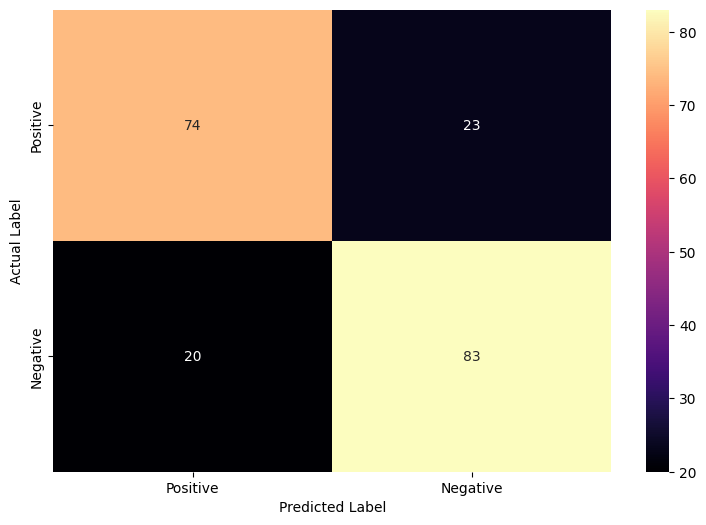

In [ ]:
plt.figure(figsize = (9,6))
sns.heatmap(cm, annot=True, cmap="magma", xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = BernoulliNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("The accuracy score for alpha {} is {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('--------------------------------------------')
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

The accuracy score for alpha 0.1 is 78.5%
The accuracy score for alpha 0.2 is 78.5%
The accuracy score for alpha 0.3 is 79.0%
The accuracy score for alpha 0.4 is 78.5%
The accuracy score for alpha 0.5 is 78.0%
The accuracy score for alpha 0.6 is 78.0%
The accuracy score for alpha 0.7 is 78.0%
The accuracy score for alpha 0.8 is 77.5%
The accuracy score for alpha 0.9 is 77.0%
The accuracy score for alpha 1.0 is 77.0%
--------------------------------------------
--------------------------------------------
--------------------------------------------
The best accuracy is 79.0% with alpha value 0.3


In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


In [ ]:
filename = 'restaurant-sentiment-mnb-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test,y_pred)
print("The Accuracy score is: {}".format(round(score1,2)))

The Accuracy score is: 0.73


In [ ]:
#Precision
from sklearn.metrics import precision_score
score2 = precision_score(y_test,y_pred)
print("The Precision score is: {}".format(round(score2,2)))

The Precision score is: 0.68


In [ ]:
#Recall
from sklearn.metrics import recall_score
score3= recall_score(y_test,y_pred)
print("The Recall score is: {}".format(round(score3,2)))



The Recall score is: 0.88


In [ ]:
print("The Accuracy, Precision, and Recall Scores:")
print("Accuracy score = {}".format(round(score1,2)))
print("Precision score = {}".format(round(score2,2)))
print("Recall score = {}".format(round(score3,2)))

The Accuracy, Precision, and Recall Scores:
Accuracy score = 0.73
Precision score = 0.68
Recall score = 0.88


In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[55, 42],
       [12, 91]], dtype=int64)

In [ ]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(83.22222222222221, 0.5, 'Actual Label')

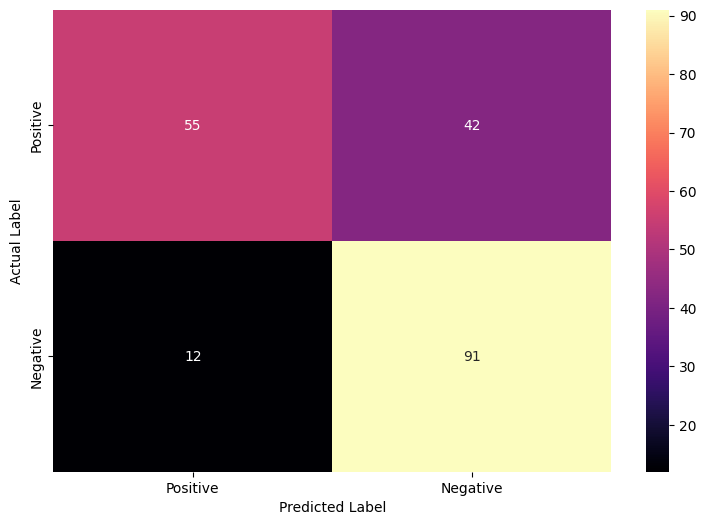

In [ ]:
plt.figure(figsize = (9,6))
sns.heatmap(cm, annot=True, cmap="magma", xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = GaussianNB()
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("The accuracy score for alpha {} is {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('--------------------------------------------')
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

The accuracy score for alpha 0.1 is 73.0%
The accuracy score for alpha 0.2 is 73.0%
The accuracy score for alpha 0.3 is 73.0%
The accuracy score for alpha 0.4 is 73.0%
The accuracy score for alpha 0.5 is 73.0%
The accuracy score for alpha 0.6 is 73.0%
The accuracy score for alpha 0.7 is 73.0%
The accuracy score for alpha 0.8 is 73.0%
The accuracy score for alpha 0.9 is 73.0%
The accuracy score for alpha 1.0 is 73.0%
--------------------------------------------
--------------------------------------------
--------------------------------------------
The best accuracy is 73.0% with alpha value 0.1
